In [ ]:
!git lfs pull

In [1]:
import os
import numpy as np
import pandas as pd
from utils import LR_logit_experiment

### RNAseq_ifnb

In [2]:
# Load Data
DATA_DIR = "../data"
X = pd.read_csv(os.path.join(DATA_DIR, "ifnb_stimulated_X.txt"), delimiter=' ').to_numpy()
y = pd.read_csv(os.path.join(DATA_DIR, "ifnb_stimulated_Y.txt"), delimiter=' ').to_numpy().reshape(-1)
save_dir = "RNAseq_ifnb/"
os.makedirs(save_dir, exist_ok=True)

In [3]:
# Dimension & Sample size
print(X.shape)
print(y.shape)

(7451, 2000)
(7451,)


In [4]:
# Re-level all the labels as 0, 1, 2, ...
unique_values, counts = np.unique(y, return_counts=True)
df = pd.DataFrame({
    'Value': unique_values,
    'Count': counts
})
print(df)
value_to_number = {value: idx for idx, value in enumerate(unique_values)}
y = np.vectorize(value_to_number.get)(y)

           Value  Count
0              B    571
1    B Activated    203
2      CD14 Mono   2147
3      CD16 Mono    537
4   CD4 Memory T    903
5    CD4 Naive T   1526
6          CD8 T    462
7             DC    214
8          Eryth     32
9             Mk    121
10            NK    321
11   T activated    333
12           pDC     81


In [5]:
def get_plot(sub_class_list, pai, random_state, bins0, bins1, save=False):
    for idx_run, sub_class in enumerate(sub_class_list):
        X_sub = X[np.isin(y, sub_class), :]
        y_sub = y[np.isin(y, sub_class)]
        # re-level the labels as 0, 1, 2, ...
        for i in range(len(sub_class)):
            y_sub[y_sub == sub_class[i]] = i
            print(f"Class {sub_class[i]} is assigned as class {i}")
        _ = LR_logit_experiment(X_sub, y_sub, save_dir, pai=pai, random_state=random_state,
                                classes=sub_class,
                                whitening_rank=0, overlay_fitted_test_Gaussian=True,
                                title=rf'\textbf{{RNAseq_ifnb, class {sub_class[0]} vs class {sub_class[1]}}}',
                                save=save, bins0=bins0, bins1=bins1)

Class 5 is assigned as class 0
Class 4 is assigned as class 1
Imbalanced training Set: {0: 763, 1: 190}
pi = 0.199
n = 953


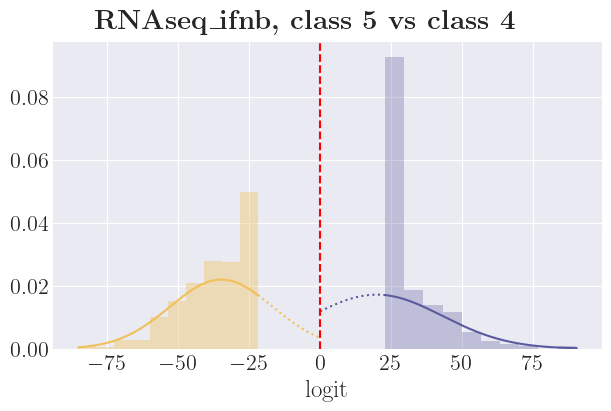

In [6]:
get_plot(sub_class_list=[[5, 4]], pai=0.2, random_state=2023, bins0=10, bins1=10, save=True)